In [2]:
import pandas as pd

# Load the cleaned CSV
df = pd.read_csv("cleaned_product_results.csv")

# Since 'Cleaned Price' is already numeric, just copy it if needed
df['Price Cleaned'] = df['Cleaned Price']

# Optional: confirm the column is numeric
print(df['Price Cleaned'].dtype)

# Preview
df[['Cleaned Price', 'Price Cleaned']].head()




float64


,Cleaned Price,Price Cleaned
0,6800.0,6800.0
1,15000.0,15000.0
2,2400.0,2400.0
3,2400.0,2400.0
4,2400.0,2400.0


In [3]:
# Median and average prices by category and product type
price_summary = df.groupby(['Category', 'Product Type'])['Price Cleaned'].agg(['mean', 'median', 'count']).reset_index()
price_summary


,Category,Product Type,mean,median,count
0,Agricultural Equipment,drone,13947.079545,6399.000,264
1,Agricultural Equipment,knapsack,1776.641371,53.500,248
2,Agricultural Equipment,seed planter,3600.837247,2250.000,247
3,Chemical,fertilizers,374.860092,287.500,218
4,Chemical,herbicides,529.199276,1.000,221
5,Chemical,insecticide,29.129828,2.000,232
6,Electronics,smart weather stations,1041.017118,230.000,288
7,Electronics,soil moisture sensors,1092.457711,38.995,284
8,Electronics,wireless solar camera,813.845215,62.500,326


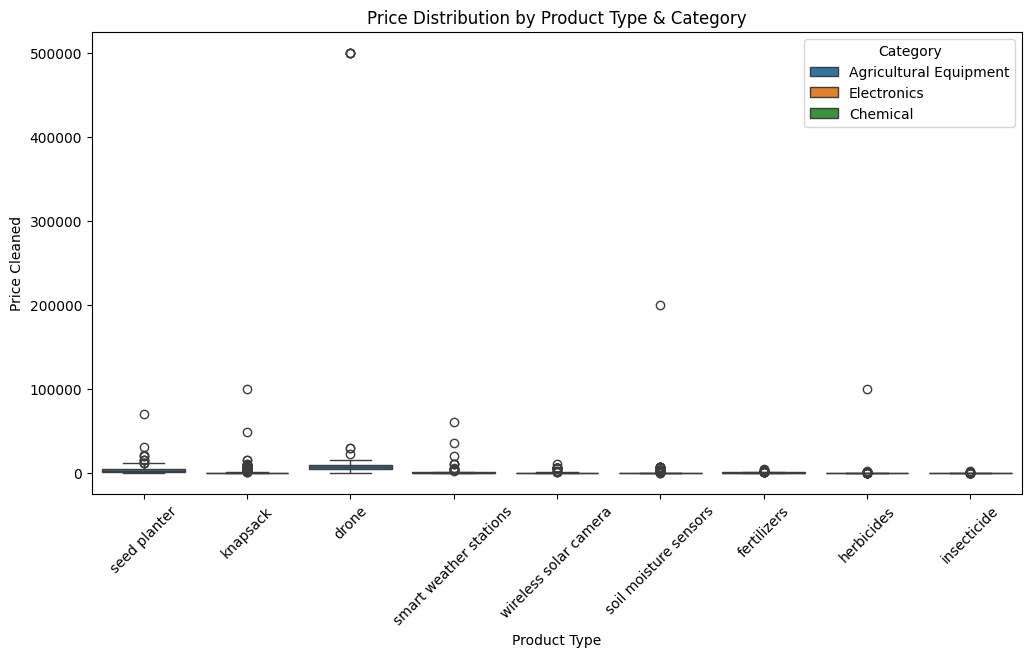

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Product Type', y='Price Cleaned', hue='Category')
plt.xticks(rotation=45)
plt.title('Price Distribution by Product Type & Category')
plt.show()


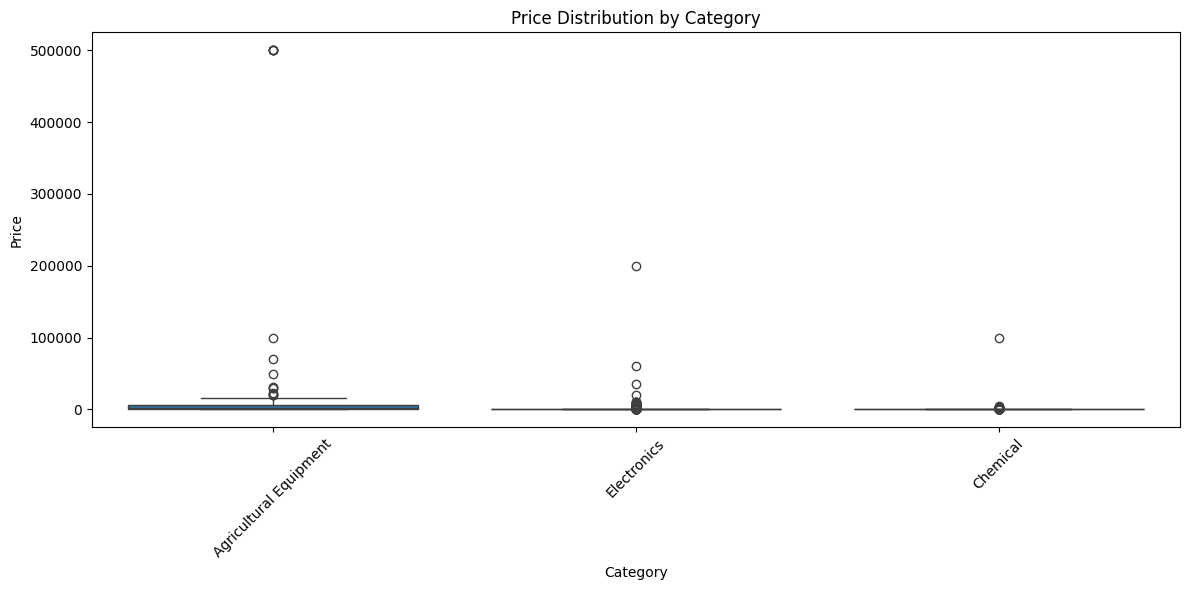

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Price Cleaned')
plt.title('Price Distribution by Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


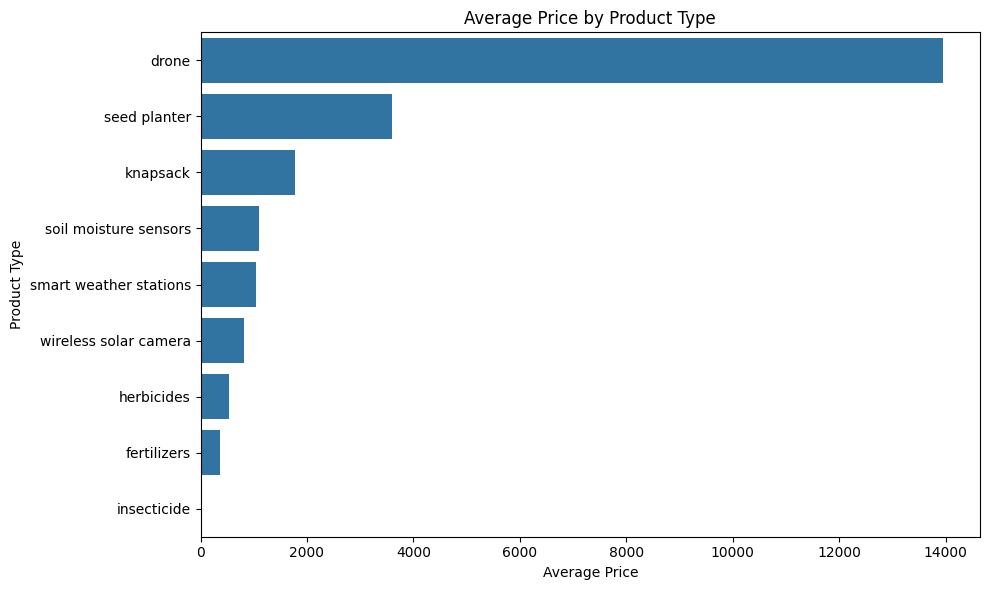

In [6]:
avg_price = df.groupby('Product Type')['Price Cleaned'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price.values, y=avg_price.index)
plt.title('Average Price by Product Type')
plt.xlabel('Average Price')
plt.ylabel('Product Type')
plt.tight_layout()
plt.show()


C:\Users\prime\AppData\Local\Temp\ipykernel_5452\637368215.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts, y='Category', x='Count', palette='viridis')
C:\Users\prime\AppData\Local\Temp\ipykernel_5452\637368215.py:21: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\prime\Desktop\SOAR\Data Analyst\Data Engineering\DE Projects\marketplace_scraper\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


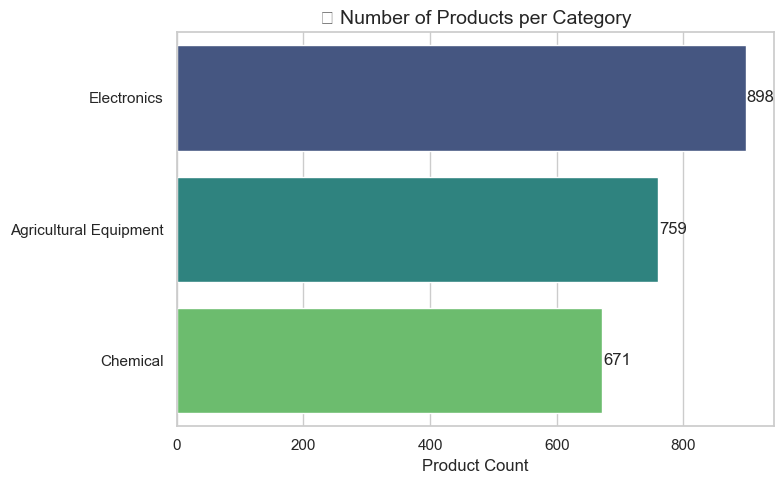

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Count per Category
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Plot
sns.barplot(data=category_counts, y='Category', x='Count', palette='viridis')

# Annotate each bar
for index, row in category_counts.iterrows():
    plt.text(row['Count'] + 2, index, row['Count'], va='center')

plt.title('🔢 Number of Products per Category', fontsize=14)
plt.xlabel('Product Count')
plt.ylabel('')
plt.tight_layout()
plt.show()


C:\Users\prime\AppData\Local\Temp\ipykernel_5452\3254744147.py:13: UserWarning: Glyph 128450 (\N{CARD INDEX DIVIDERS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\prime\AppData\Local\Temp\ipykernel_5452\3254744147.py:13: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\prime\Desktop\SOAR\Data Analyst\Data Engineering\DE Projects\marketplace_scraper\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128450 (\N{CARD INDEX DIVIDERS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\prime\Desktop\SOAR\Data Analyst\Data Engineering\DE Projects\marketplace_scraper\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


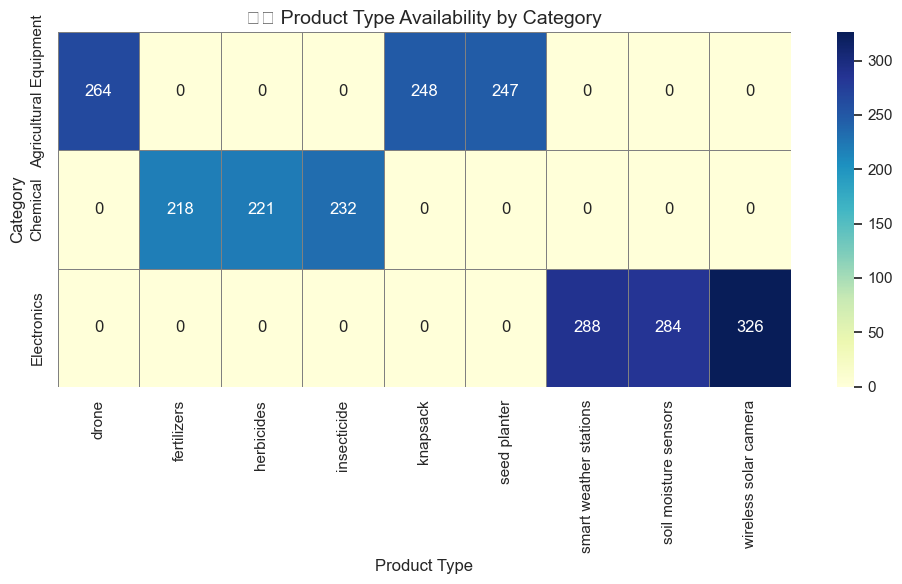

In [10]:
# Grouped count matrix
product_matrix = df.groupby(['Category', 'Product Type']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.set(style="white")

# Heatmap
sns.heatmap(product_matrix, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5, linecolor='gray')

plt.title('🗂️ Product Type Availability by Category', fontsize=14)
plt.xlabel('Product Type')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


In [11]:
df['Company Name'] = df['Company Name'].fillna('Unknown').str.strip()


C:\Users\prime\AppData\Local\Temp\ipykernel_5452\1299744920.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\prime\AppData\Local\Temp\ipykernel_5452\1299744920.py:21: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\prime\Desktop\SOAR\Data Analyst\Data Engineering\DE Projects\marketplace_scraper\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


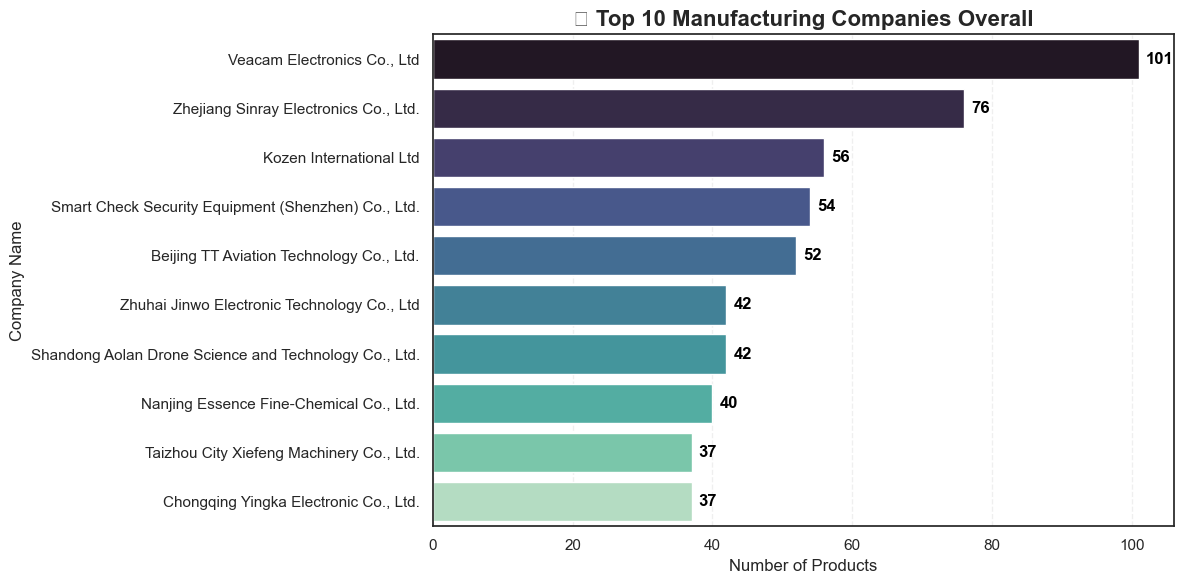

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

top_companies = df['Company Name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_companies.values,
    y=top_companies.index,
    palette="mako"
)
plt.title('🏢 Top 10 Manufacturing Companies Overall', fontsize=16, weight='bold')
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Company Name', fontsize=12)

# Annotate bars
for i, v in enumerate(top_companies.values):
    plt.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\prime\AppData\Local\Temp\ipykernel_5452\2449610755.py:22: UserWarning: Glyph 127981 (\N{FACTORY}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\prime\Desktop\SOAR\Data Analyst\Data Engineering\DE Projects\marketplace_scraper\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127981 (\N{FACTORY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


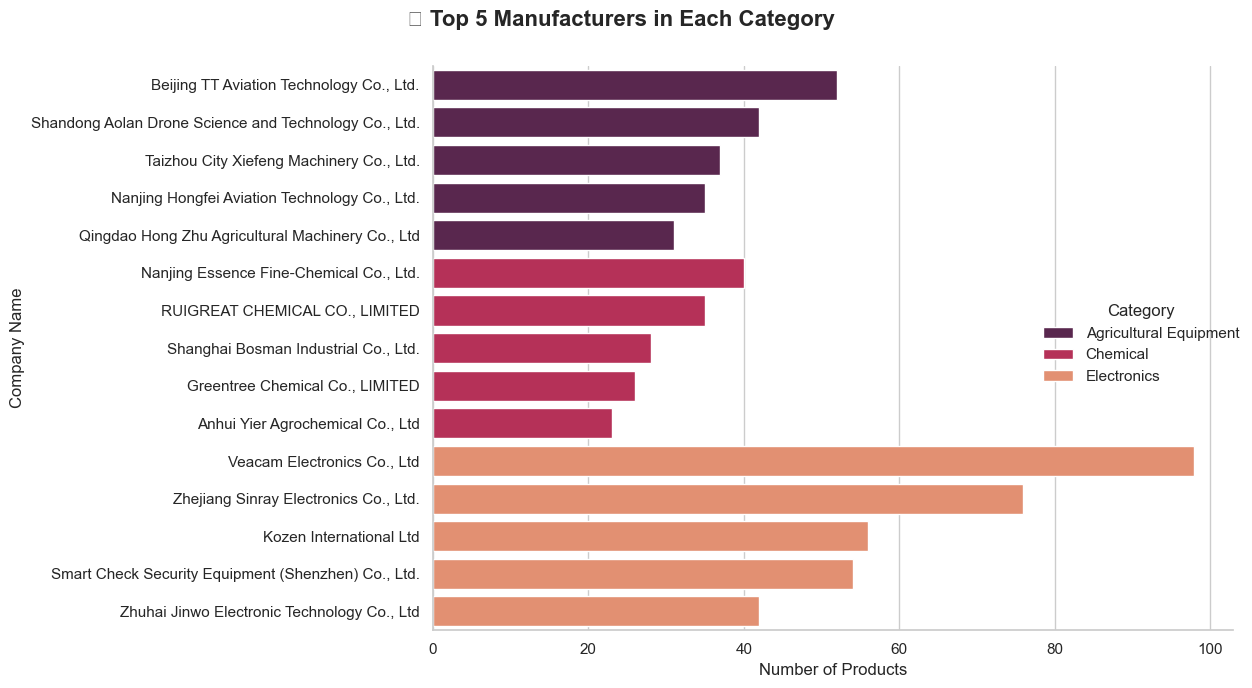

In [15]:
# Top 5 companies per category
grouped = df.groupby(['Category', 'Company Name']).size().reset_index(name='Count')
top_per_category = grouped.sort_values(['Category', 'Count'], ascending=[True, False]).groupby('Category').head(5)

# Set the visual theme
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=top_per_category,
    x="Count",
    y="Company Name",
    hue="Category",
    kind="bar",
    palette="rocket",
    height=7,
    aspect=1.5
)

g.fig.suptitle("🏭 Top 5 Manufacturers in Each Category", fontsize=16, weight='bold')
g.set_axis_labels("Number of Products", "Company Name")
g._legend.set_title("Category")
g.set_titles("")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


C:\Users\prime\AppData\Local\Temp\ipykernel_5452\2810000371.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\prime\Desktop\SOAR\Data Analyst\Data Engineering\DE Projects\marketplace_scraper\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


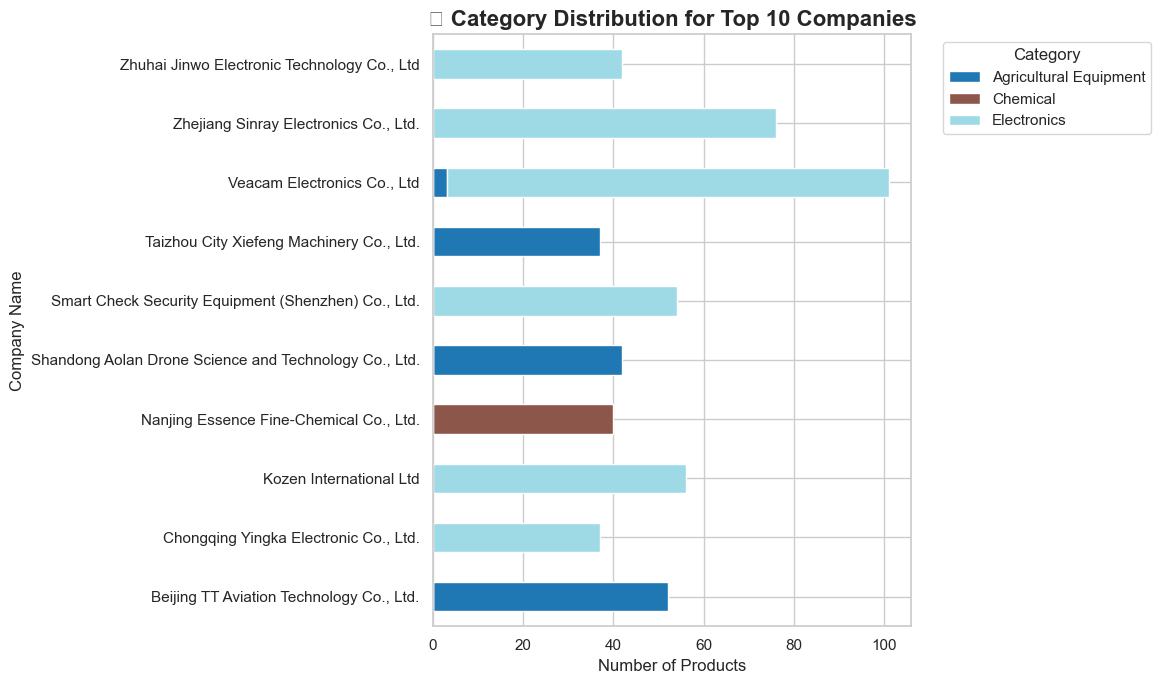

In [16]:
# Get top 10 companies overall
top_10_names = df['Company Name'].value_counts().head(10).index
filtered_df = df[df['Company Name'].isin(top_10_names)]

# Pivot for stacked bar
stacked = filtered_df.groupby(['Company Name', 'Category']).size().unstack(fill_value=0)

# Plot
stacked.plot(kind='barh', stacked=True, colormap='tab20', figsize=(12, 7))
plt.title("📊 Category Distribution for Top 10 Companies", fontsize=16, weight='bold')
plt.xlabel("Number of Products")
plt.ylabel("Company Name")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
